In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("/content/Car details v3.csv")

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
df.shape

(8128, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [6]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [7]:
df.isna().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,221
engine,221


<Axes: >

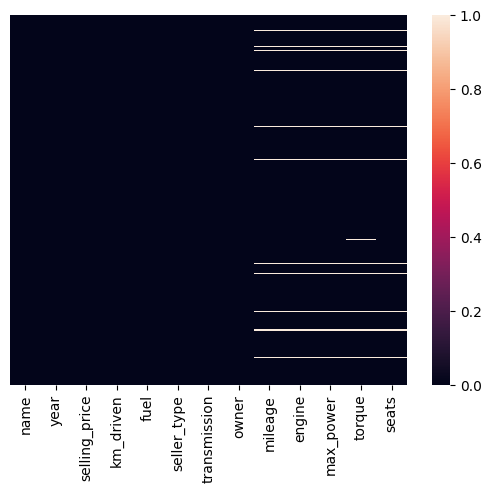

In [8]:
sns.heatmap(data= df.isnull(), yticklabels= False, cbar= True)

In [9]:
df = df[["name", "year", "selling_price", "km_driven", "fuel", "seller_type", "transmission", "owner"]]

In [10]:
df["Age"] = 2024 - df["year"]

<ipython-input-10-841ec5c2a6ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Age"] = 2024 - df["year"]


In [11]:
df.drop(labels= "name", axis= 1, inplace= True)

<ipython-input-11-46ccdcd00cf8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(labels= "name", axis= 1, inplace= True)


In [12]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Age
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,10
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,10
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,18
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,14
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,17


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year           8128 non-null   int64 
 1   selling_price  8128 non-null   int64 
 2   km_driven      8128 non-null   int64 
 3   fuel           8128 non-null   object
 4   seller_type    8128 non-null   object
 5   transmission   8128 non-null   object
 6   owner          8128 non-null   object
 7   Age            8128 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 508.1+ KB


**Missing Values Check**

In [14]:
df.isnull().sum()

,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
Age,0


<Axes: >

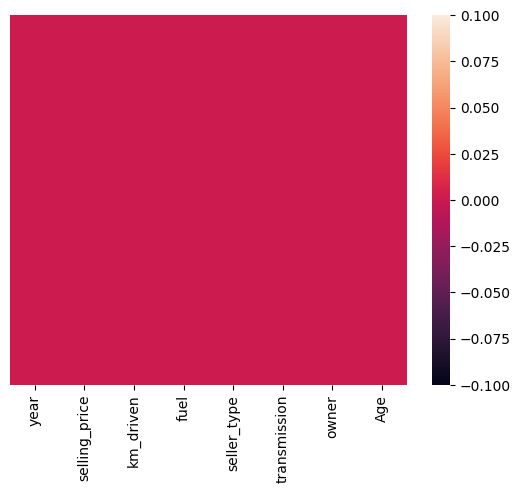

In [15]:
sns.heatmap(df.isna(), yticklabels= False, cbar= True)

In [16]:
df.loc[df.duplicated()]

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Age
291,2017,450000,35000,Petrol,Individual,Manual,First Owner,7
296,2012,330000,50000,Petrol,Individual,Manual,Second Owner,12
370,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,7
371,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,5
372,2017,3200000,45000,Diesel,Dealer,Automatic,First Owner,7
...,...,...,...,...,...,...,...,...
8043,2007,100000,60000,Petrol,Individual,Manual,Third Owner,17
8080,2010,300000,100000,Diesel,Individual,Manual,First Owner,14
8117,2015,625000,50000,Diesel,Individual,Manual,First Owner,9
8126,2013,290000,25000,Diesel,Individual,Manual,First Owner,11


**Data Visulization**

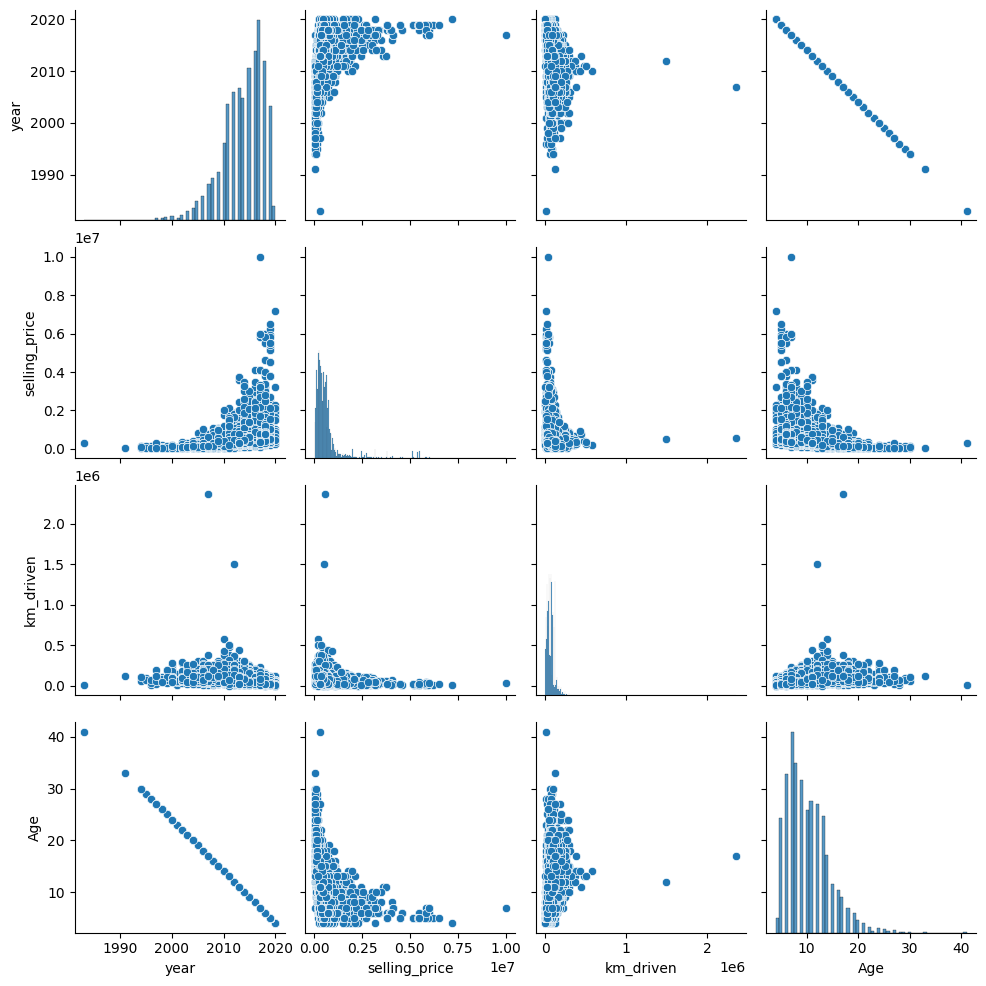

In [17]:
sns.pairplot(df)

[Text(0.5, 0, 'owner'), Text(0, 0.5, 'Frequency of owner')]

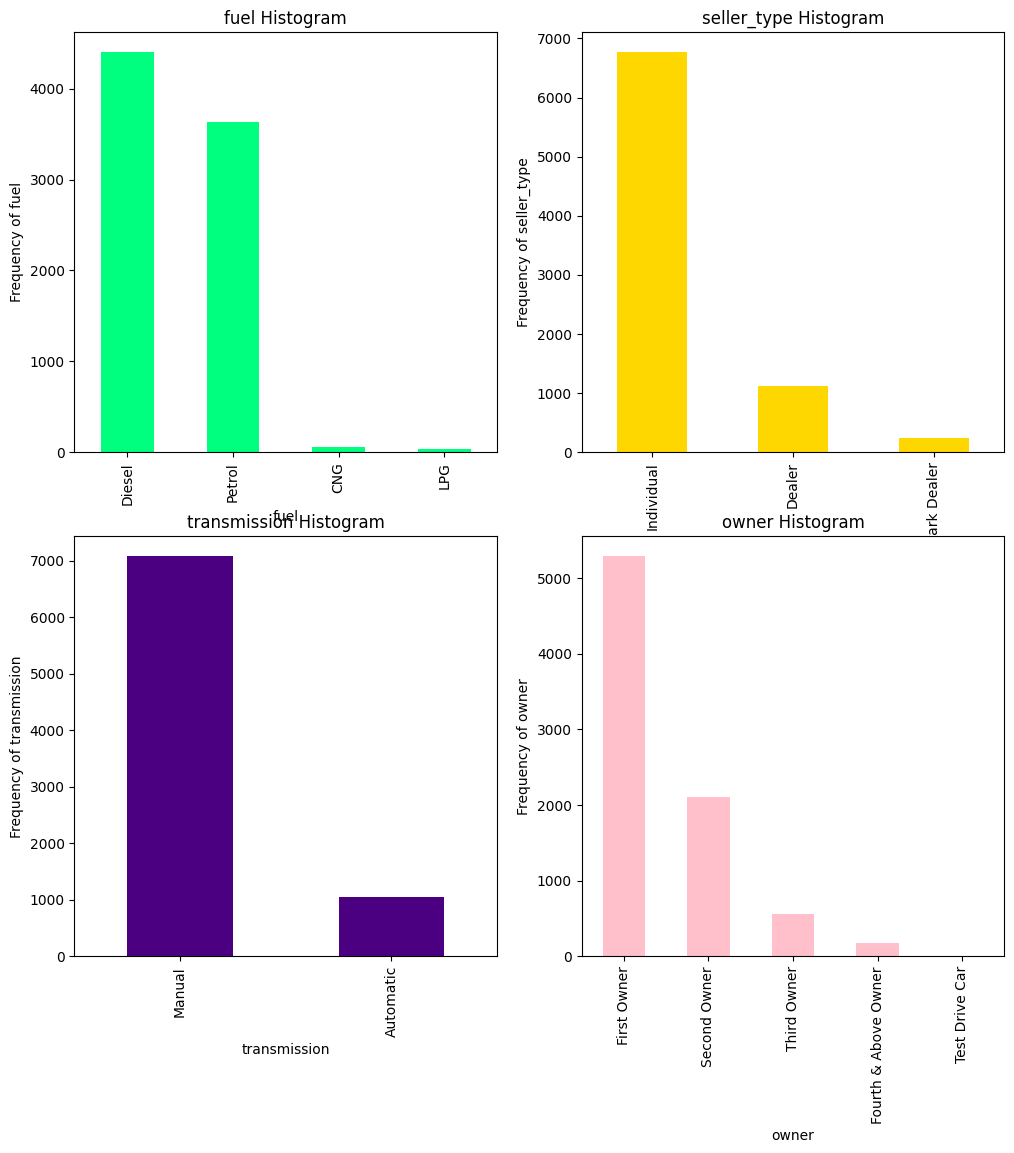

In [18]:
plt.figure(figsize= (12, 12))

plt.subplot(2, 2, 1)
plt_1 = df["fuel"].value_counts().plot(kind= "bar", color= "springgreen")
plt.title("fuel Histogram")
plt_1.set(xlabel= "fuel", ylabel= "Frequency of fuel")

plt.subplot(2, 2, 2)
plt_2 = df["seller_type"].value_counts().plot(kind= "bar", color= "gold")
plt.title("seller_type Histogram")
plt_2.set(xlabel= "seller_type", ylabel= "Frequency of seller_type")

plt.subplot(2, 2, 3)
plt_3 = df["transmission"].value_counts().plot(kind= "bar", color= "indigo")
plt.title("transmission Histogram")
plt_3.set(xlabel= "transmission", ylabel= "Frequency of transmission")

plt.subplot(2, 2, 4)
plt_4 = df["owner"].value_counts().plot(kind= "bar", color= "pink")
plt.title("owner Histogram")
plt_4.set(xlabel= "owner", ylabel= "Frequency of owner")

<ipython-input-19-86358fd1a9a5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= df, x= "fuel", palette= "viridis")
<ipython-input-19-86358fd1a9a5>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= df, x= "seller_type", palette= "bright")
<ipython-input-19-86358fd1a9a5>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= df, x= "transmission", palette= "husl")
<ipython-input-19-86358fd1a9a5>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variabl

Text(0.5, 1.0, 'owner')

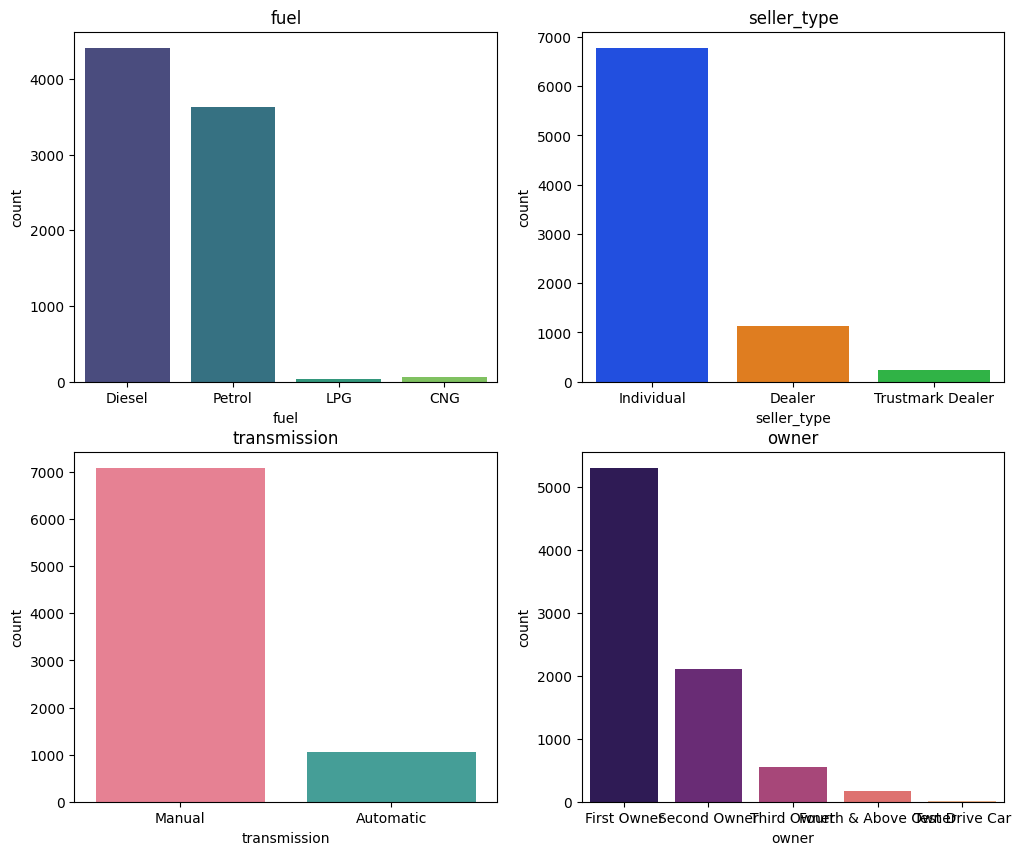

In [19]:
plt.figure(figsize= (12, 10))

plt.subplot(2, 2, 1)
sns.countplot(data= df, x= "fuel", palette= "viridis")
plt.title("fuel")

plt.subplot(2, 2, 2)
sns.countplot(data= df, x= "seller_type", palette= "bright")
plt.title("seller_type")

plt.subplot(2, 2, 3)
sns.countplot(data= df, x= "transmission", palette= "husl")
plt.title("transmission")

plt.subplot(2, 2, 4)
sns.countplot(data= df, x= "owner", palette= "magma")
plt.title("owner")


Text(0.5, 1.0, 'owner')

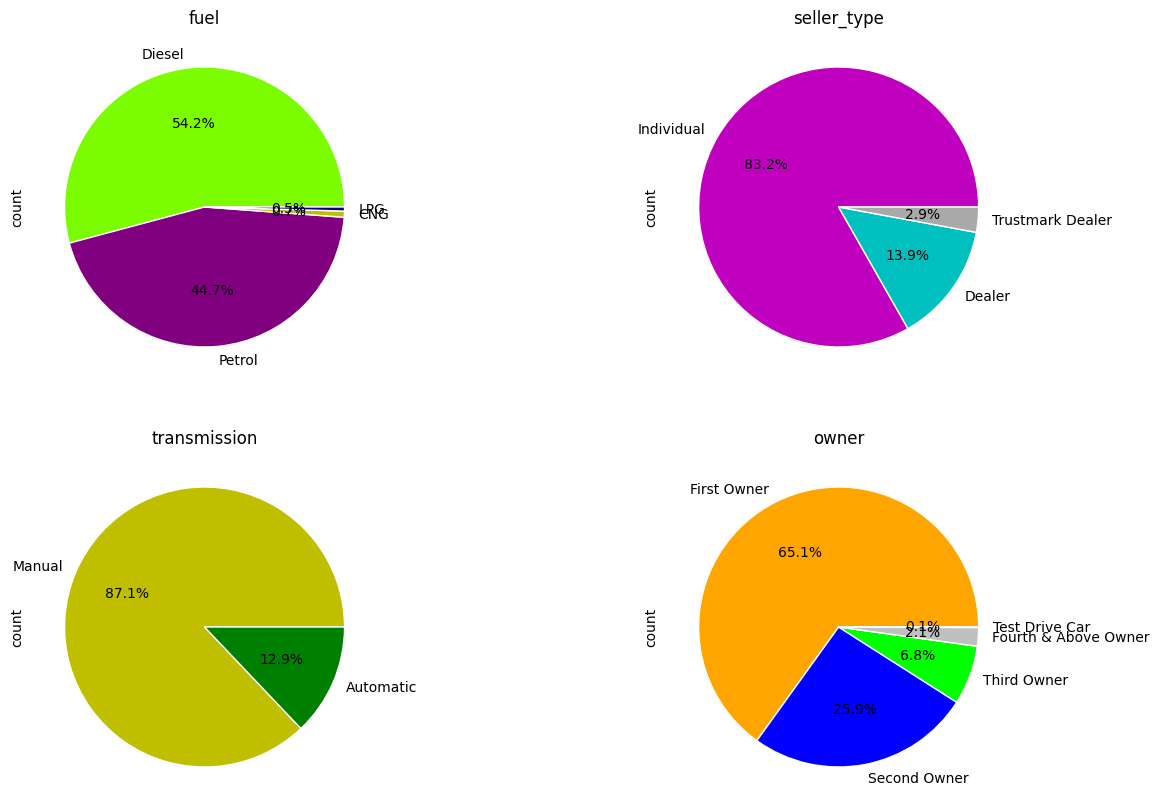

In [20]:
plt.figure(figsize= (15, 10))

plt.subplot(2, 2, 1)
plt_1 = df["fuel"].value_counts().plot(kind= "pie",
                                       autopct= "%1.1f%%",
                                       colors= ["lawngreen", "purple", "y", "navy"],
                                       wedgeprops= {"linewidth": 1, "edgecolor": "white"})
plt.title("fuel")

plt.subplot(2, 2, 2)
plt_2 = df["seller_type"].value_counts().plot(kind= "pie",
                                              autopct= "%1.1f%%",
                                              colors= ["m", "c", "darkgray"],
                                              wedgeprops= {"linewidth": 1, "edgecolor": "white"})
plt.title("seller_type")

plt.subplot(2, 2, 3)
plt_3 = df["transmission"].value_counts().plot(kind= "pie",
                                               autopct= "%1.1f%%",
                                               colors= ["y", "g"],
                                               wedgeprops= {"linewidth": 1, "edgecolor": "white"})
plt.title("transmission")

plt.subplot(2, 2, 4)
plt_4 = df["owner"].value_counts().plot(kind= "pie",
                                        autopct= "%1.1f%%",
                                        colors= ["orange", "b", "lime", "silver", "magenta"],
                                        wedgeprops= {"linewidth": 1, "edgecolor": "white"})
plt.title("owner")

In [21]:
cl_category = ["fuel", "seller_type", "transmission", "owner"]

for i in cl_category:
  print(df[i].unique())

['Diesel' 'Petrol' 'LPG' 'CNG']
['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']


In [22]:
df[cl_category].head()

,fuel,seller_type,transmission,owner
0,Diesel,Individual,Manual,First Owner
1,Diesel,Individual,Manual,Second Owner
2,Petrol,Individual,Manual,Third Owner
3,Diesel,Individual,Manual,First Owner
4,Petrol,Individual,Manual,First Owner


In [23]:
df["fuel"] = df["fuel"].astype("category")
df["fuel"] = df["fuel"].cat.codes

df["seller_type"] = df["seller_type"].astype("category")
df["seller_type"] = df["seller_type"].cat.codes

df["transmission"] = df["transmission"].astype("category")
df["transmission"] = df["transmission"].cat.codes

df["owner"] = df["owner"].astype("category")
df["owner"] = df["owner"].cat.codes

In [24]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Age
0,2014,450000,145500,1,1,1,0,10
1,2014,370000,120000,1,1,1,2,10
2,2006,158000,140000,3,1,1,4,18
3,2010,225000,127000,1,1,1,0,14
4,2007,130000,120000,3,1,1,0,17


In [25]:
df.corr()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Age
year,1.000000,0.414092,-0.418006,-0.050312,-0.146042,-0.244707,-0.477249,-1.000000
selling_price,0.414092,1.000000,-0.225534,-0.194029,-0.335857,-0.588845,-0.229174,-0.414092
km_driven,-0.418006,-0.225534,1.000000,-0.265877,0.122105,0.201229,0.280340,0.418006
fuel,-0.050312,-0.194029,-0.265877,1.000000,0.110512,-0.035255,-0.022339,0.050312
seller_type,-0.146042,-0.335857,0.122105,0.110512,1.000000,0.227871,0.143443,0.146042
transmission,-0.244707,-0.588845,0.201229,-0.035255,0.227871,1.000000,0.147458,0.244707
owner,-0.477249,-0.229174,0.280340,-0.022339,0.143443,0.147458,1.000000,0.477249
Age,-1.000000,-0.414092,0.418006,0.050312,0.146042,0.244707,0.477249,1.000000


<Axes: >

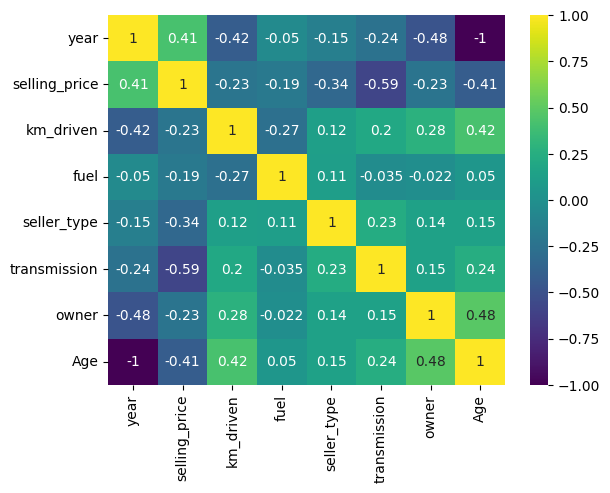

In [26]:
sns.heatmap(df.corr(), annot= True, cmap= "viridis")

**Train Test Split**

In [27]:
X = df.drop("selling_price", axis= 1)
y = df["selling_price"]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 75)

**Scaling the data for better training**

In [29]:
scaler = StandardScaler()

In [30]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

**Building Artifical Neural Network**

In [31]:
model = Sequential()

model.add(Dense(40, activation= "relu"))
model.add(Dense(35, activation= "relu"))
model.add(Dense(30, activation= "relu"))
model.add(Dense(25, activation= "relu"))
model.add(Dense(20, activation= "relu"))
model.add(Dense(15, activation= "relu"))
model.add(Dense(10, activation= "relu"))
model.add(Dense(1))

model.compile(optimizer= "rmsprop", loss= "mse")

In [32]:
model.fit(X_train, y_train,
          epochs= 200,
          validation_data= (X_test, y_test))

Epoch 1/200
191/191 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1085108256768.0000 - val_loss: 886211739648.0000
Epoch 2/200
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 868257955840.0000 - val_loss: 304540811264.0000
Epoch 3/200
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 337844568064.0000 - val_loss: 269375062016.0000
Epoch 4/200
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 312162648064.0000 - val_loss: 262451249152.0000
Epoch 5/200
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 317763026944.0000 - val_loss: 247435984896.0000
Epoch 6/200
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 294824607744.0000 - val_loss: 242430033920.0000
Epoch 7/200
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 296707588096.0000 - val_loss: 239197618176.0000
Epoch 8/200
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 268758761472.0000 - val_loss: 236030132224.0000
Epoch 9/200
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 269213532160.0000 - val_loss: 236667158528.0000
Epoch 10/200
191/1

In [33]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,val_loss
0,1.086899e+12,8.862117e+11
1,6.629696e+11,3.045408e+11
2,3.394137e+11,2.693751e+11
3,3.093277e+11,2.624512e+11
4,2.973522e+11,2.474360e+11


<Axes: >

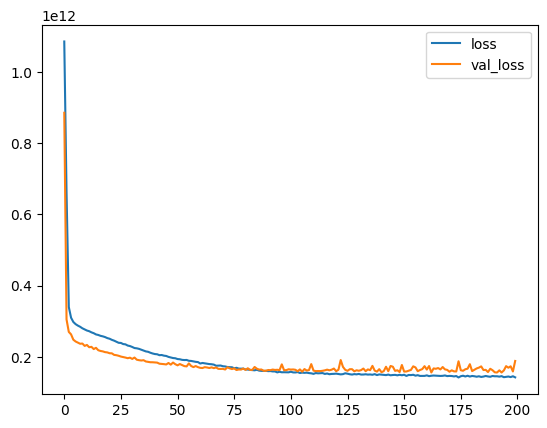

In [34]:
loss_df.plot()

**Model Evaluation**

In [35]:
model.evaluate(X_test, y_test)

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 137147940864.0000


187576025088.0

In [36]:
train_prediction = model.predict(X_train)

191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [37]:
test_prediction = model.predict(X_test)

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [38]:
r2_train = r2_score(y_train, train_prediction)
print(r2_train)

0.7772950418121035


In [39]:
r2_test = r2_score(y_test, test_prediction)
print(r2_test)

0.6590779399450009
